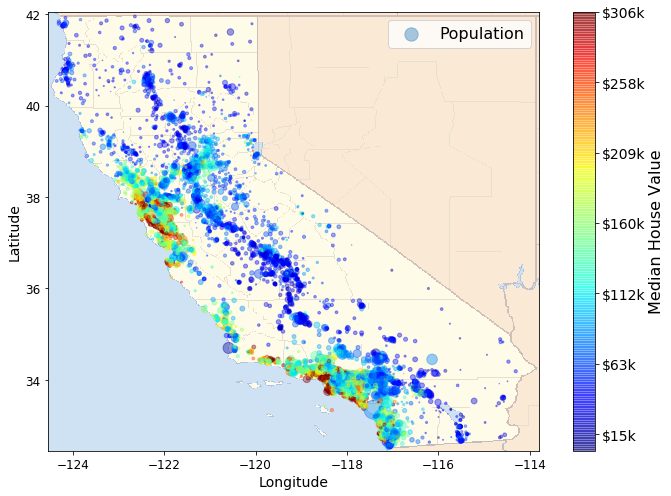

In [1]:
import os
import tarfile
from six.moves import urllib 


In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
print(HOUSING_PATH)
print(HOUSING_URL)

datasets\housing
https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz


In [3]:
def fetch_housing_data(HOUSING_URL1, HOUSING_PATH1):
    housing_url=HOUSING_URL
    housing_path=HOUSING_PATH 
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    print(tgz_path)
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
import pandas as pd

def load_housing_data(housing_path = HOUSING_PATH): 
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
fetch_housing_data(HOUSING_URL,HOUSING_PATH)

datasets\housing\housing.tgz


In [6]:
housing=load_housing_data(HOUSING_PATH)

In [7]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [11]:
housing["total_rooms"].value_counts()

total_rooms
1527.0     18
1613.0     17
1582.0     17
2127.0     16
1717.0     15
           ..
9614.0      1
10839.0     1
11872.0     1
6205.0      1
10035.0     1
Name: count, Length: 5926, dtype: int64

In [12]:
housing.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


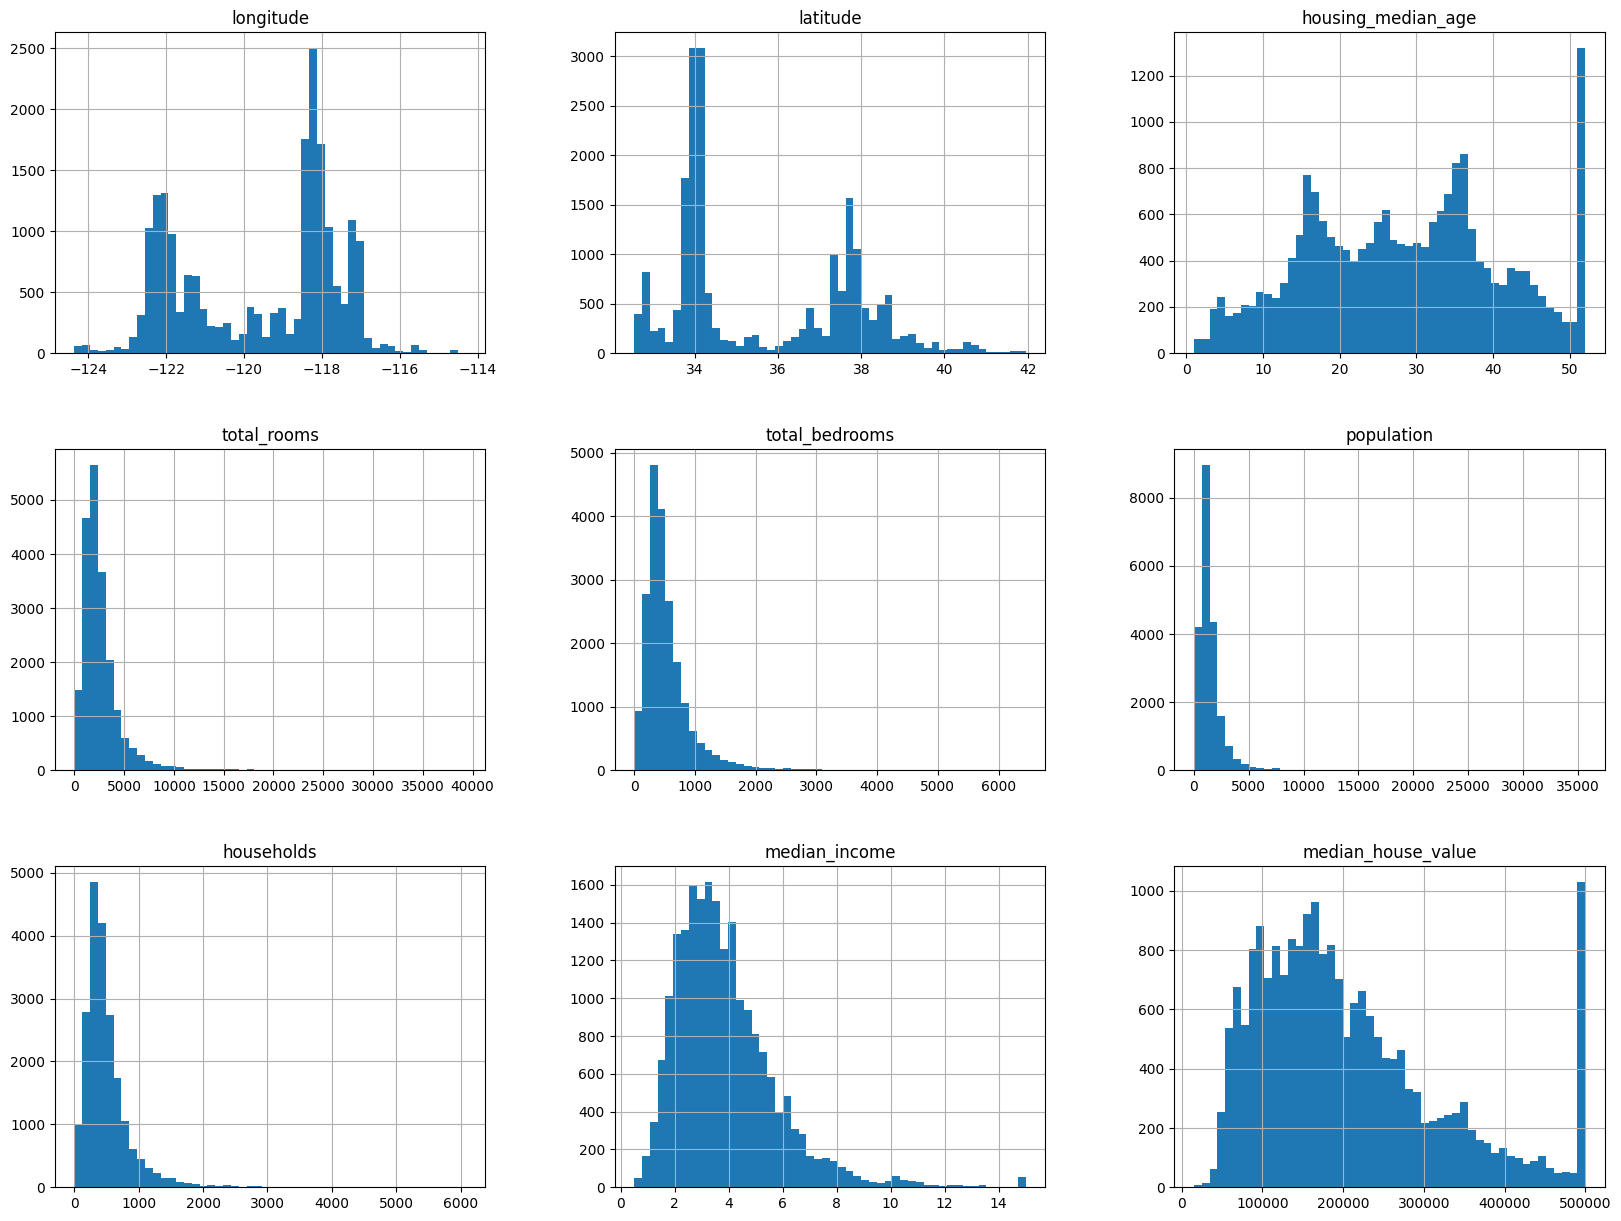

In [13]:
%matplotlib inline 
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [14]:
import numpy as np 

def split_train_test(data, test_ratio):
    np.random.seed(42)                                # USe of random seed
    shuffled_indices = np.random.permutation(len(data)) 
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]   # Getting the indices of the shuffled set from 0 to test_set_size 
    train_indices = shuffled_indices[test_set_size:]  # Getting the indices of the shuffled set from test_set_size to end of the data 
    return data.iloc[train_indices], data.iloc[test_indices] 

In [15]:
train_set, test_set = split_train_test(housing, 0.2)

In [16]:
len(test_set)

4128

In [17]:
len(train_set)

16512

In [18]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


In [19]:
train_set,test_set = split_train_test(housing, 0.2)

In [20]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


In [21]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [22]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio*2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_:test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set] 

In [23]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [24]:
housing_with_id = housing.reset_index()

In [25]:
train_set.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [26]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [27]:
housing_with_id=housing .reset_index()

In [28]:
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [29]:
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [30]:
train_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


In [31]:
train_set.iloc[3,1]*1000

-122250.0

In [32]:
housing_with_id["id"] = housing["longitude"]*1000 + housing["latitude"]

In [33]:
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15


In [34]:
train_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


In [35]:
from sklearn.model_selection import train_test_split

train_set,test_set =train_test_split(housing,test_size=0.2,random_state=42)

In [36]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [37]:
housing ["income_cat"]= pd.cut(housing["median_income"],bins=[0,1.5,3.0,4.5,6,np.inf],
                              labels=[1,2,3,4,5])

<Axes: >

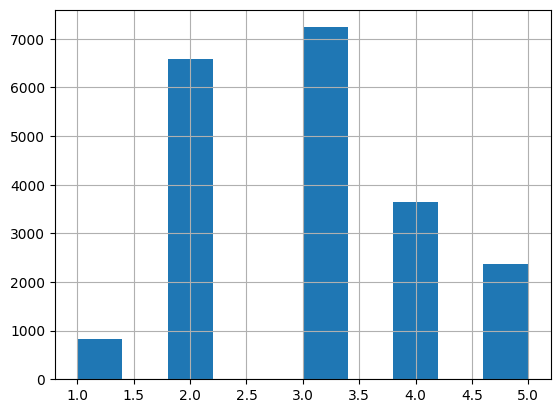

In [38]:
housing["income_cat"].hist()

In [39]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [40]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index ,test_index in split.split(housing,housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set =  housing.loc[test_index]

In [41]:
strat_train_set["income_cat"].value_counts()/len(strat_train_set)

income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [42]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Exploratory Data Analysis (EDA)

### Assignment has a good chunck of marks allocated to EDA  
     #### Assignment --> Theory behind the algorithm --> Present the thory properly in your writin ****
     
### Put your test set aside and only use the training set for EDA
        - Take the part of the data set for EDA (Exploration set) if the data set is very large 

In [43]:
housing_tr=strat_train_set.copy()


<Axes: xlabel='longitude', ylabel='latitude'>

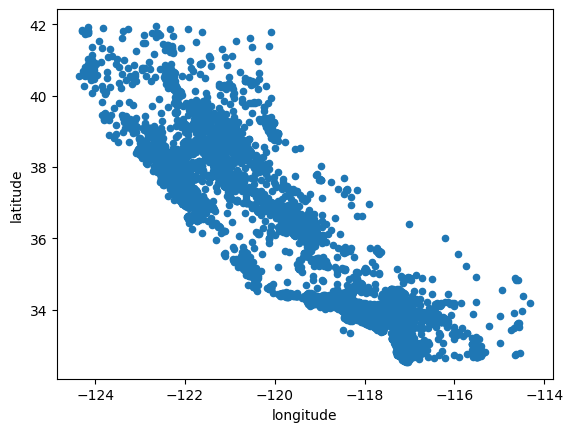

In [44]:
housing_tr.plot(kind="scatter",x="longitude", y ="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

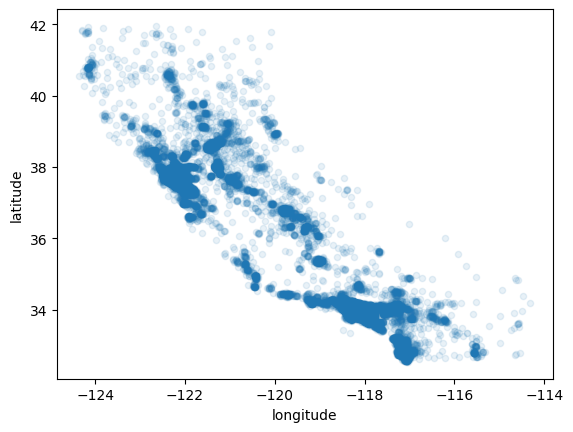

In [45]:
housing_tr.plot(kind= "scatter", x="longitude", y ="latitude", alpha = 0.1)

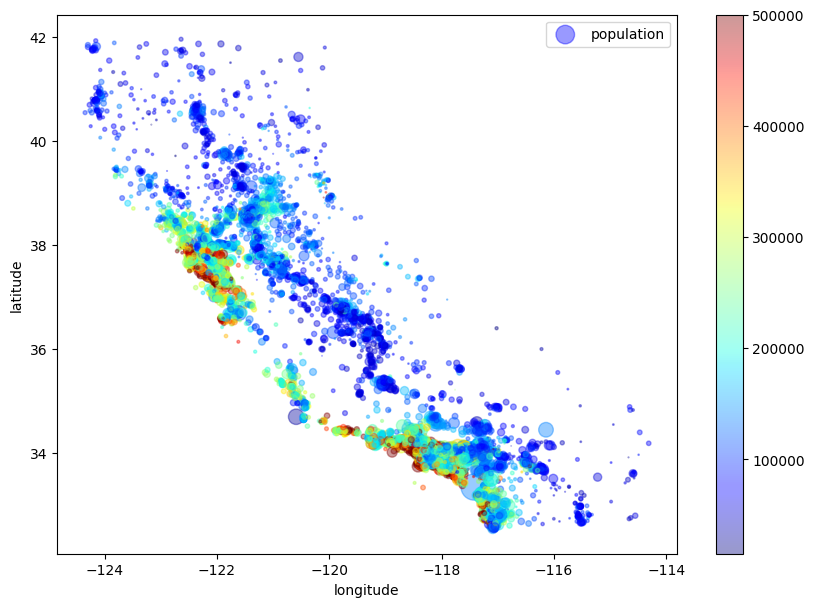

In [46]:
housing_tr.plot(kind="scatter", x="longitude", y ="latitude", alpha = 0.4, 
             s = housing_tr["population"]/100, label="population", figsize=(10,7), 
             c = housing_tr["median_house_value"], cmap=plt.get_cmap("jet"), colorbar = True,
            )
plt.legend()

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>,
        <Axes: xlabel='latitude', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>,
        <Axes: xlabel='latitude', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>,
        <Axes: xlabel='latitude', ylabel='total_rooms'>],
       [<Axes

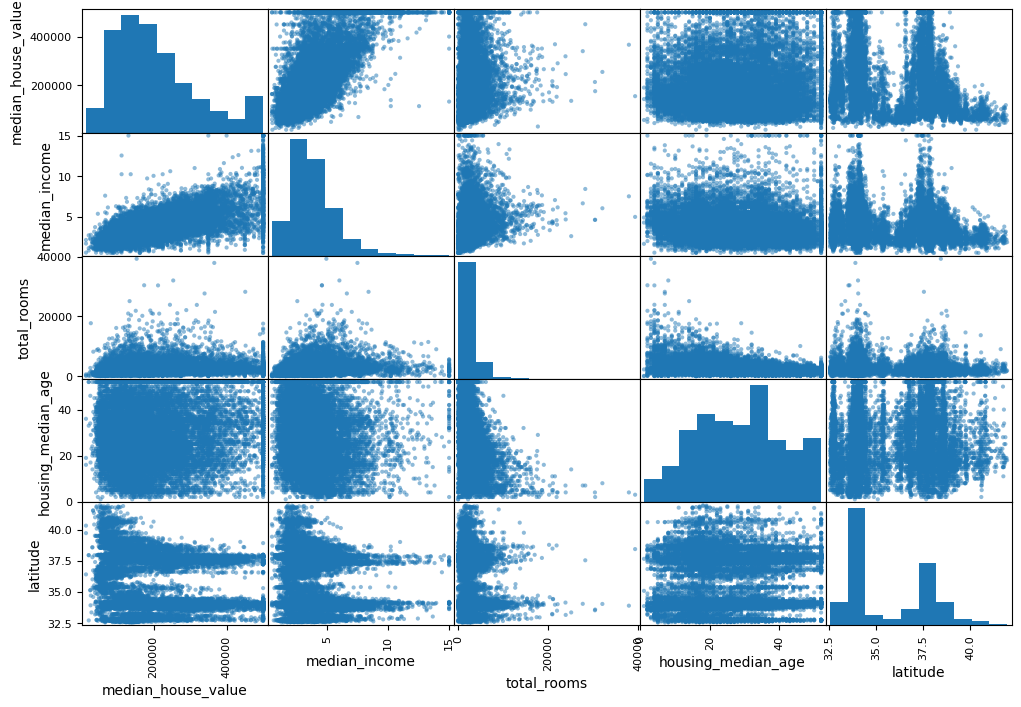

In [47]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age", "latitude"]

scatter_matrix(housing_tr[attributes], figsize=(12,8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

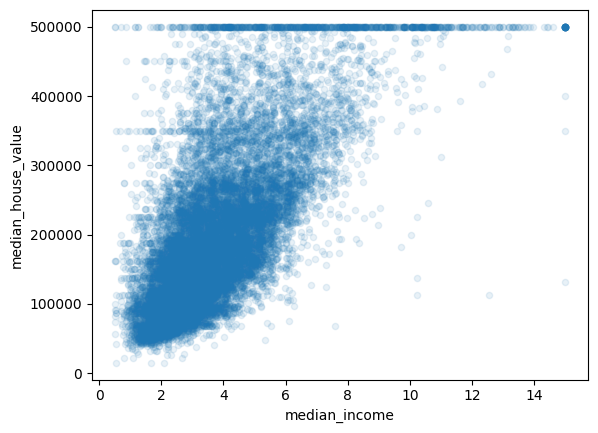

In [48]:
housing_tr.plot(kind="scatter" ,x="median_income",y="median_house_value",alpha=0.1)

In [49]:
housing_tr["rooms_per_household"] = housing_tr["total_rooms"]/ housing_tr["households"] 
housing_tr["bedrooms_per_room"] = housing_tr["total_bedrooms"]/ housing_tr["total_rooms"] 
housing_tr["population_per_hosehold"] = housing_tr["population"]/ housing_tr["households"] 

In [50]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_hosehold
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,0.182692,3.167241


In [51]:
housing_tr=strat_train_set.copy()

In [52]:
housing_tr.head

<bound method NDFrame.head of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   
...          ...       ...                 ...          ...             ...   
15174    -117.07     33.03                14.0       6665.0          1231.0   
12661    -121.42     38.51                15.0       7901.0          1422.0   
19263    -122.72     38.44                48.0        707.0           166.0   
19140    -122.70     38.31                14.0       3155.0           580.0   
19773    -122.14     39.97                27.0       1079.0           222.0   

       population  ho

In [53]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [54]:
housing_tr = strat_train_set.drop("median_house_value", axis =1)
housing_tr_labels = strat_train_set["median_house_value"].copy()

In [55]:
housing_tr_labels.head()

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: median_house_value, dtype: float64

In [56]:
from sklearn.impute import SimpleImputer

imputer =SimpleImputer(strategy="median")

housing_num=housing_tr.drop("ocean_proximity", axis=1)

imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [57]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [58]:
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [59]:
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [60]:
x=imputer.transform(housing_num)

In [61]:
x

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [62]:
housing_num_tr=pd.DataFrame(x,columns=housing_num.columns)

In [63]:
housing_num_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [64]:
housing_cat = housing_tr[["ocean_proximity"]] 

In [65]:
housing_cat.head(100)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
...,...
13322,INLAND
17922,<1H OCEAN
14458,NEAR OCEAN
20291,NEAR OCEAN


In [66]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
housing_cat_encoder=ordinal_encoder.fit_transform(housing_cat)

In [67]:
housing_cat_encoder[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [68]:
ordinal_encoder.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [69]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
housing_cat_1hot= cat_encoder.fit_transform(housing_cat)

In [70]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [71]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [72]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [73]:
housing_cat.head()

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN


In [74]:
housing_cat_1hot_pd=pd.DataFrame(housing_cat_1hot, columns=housing_cat.columns)

In [75]:
housing_cat_1hot_pd.head()

,ocean_proximity
0,"(0, 1)\t1.0"
1,"(0, 4)\t1.0"
2,"(0, 1)\t1.0"
3,"(0, 4)\t1.0"
4,"(0, 0)\t1.0"


In [76]:
housing_cat_1hot_pd =  pd.DataFrame(housing_cat_1hot, columns=housing_cat.columns )

In [77]:
housing_cat_1hot_pd.head()

,ocean_proximity
0,"(0, 1)\t1.0"
1,"(0, 4)\t1.0"
2,"(0, 1)\t1.0"
3,"(0, 4)\t1.0"
4,"(0, 0)\t1.0"


In [78]:
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [79]:
housing_cat_1hot_pd.head(10)

,ocean_proximity
0,"(0, 1)\t1.0"
1,"(0, 4)\t1.0"
2,"(0, 1)\t1.0"
3,"(0, 4)\t1.0"
4,"(0, 0)\t1.0"
5,"(0, 3)\t1.0"
6,"(0, 0)\t1.0"
7,"(0, 0)\t1.0"
8,"(0, 0)\t1.0"
9,"(0, 0)\t1.0"


In [80]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

room_ix, bedroom_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        rooms_per_household = X[:, room_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedroom_ix] / X[:, room_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [81]:
housing_tr.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN


In [82]:
attr_adder=CombinedAttributeAdder(add_bedrooms_per_room=False)

In [83]:
housing_extra_attribs = attr_adder.transform(housing_tr.values)

In [84]:
housing_extra_attribs_pd=pd.DataFrame(housing_extra_attribs)

In [85]:
housing_extra_attribs_pd.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
4,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


## Featur Scaling

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


num_pipeline = Pipeline([
    ('inputer',SimpleImputer(strategy='median')),
    ('attribs_adder',CombinedAttributeAdder()),
    ('std_scaler',StandardScaler())
])

In [87]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [88]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [89]:
from sklearn.compose import ColumnTransformer
num_attribs=list(housing_num)
cat_attribs=["ocean_proximity"]

full_pipeline= ColumnTransformer([
   ("num",num_pipeline, num_attribs),
    ("cat",OneHotEncoder(), cat_attribs),
])

In [90]:
num_attribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [91]:
housing_prepaired=full_pipeline.fit_transform(housing_tr)

In [92]:
housing_prepaired

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [93]:
housing_prepaired_pd=pd.DataFrame(housing_prepaired)


In [94]:
    housing_prepaired_pd.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,0.017395,0.006223,-0.121122,0.0,1.0,0.0,0.0,0.0
1,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,0.569256,-0.040811,-0.810867,0.0,0.0,0.0,0.0,1.0
2,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,-0.018024,-0.075371,-0.338273,0.0,1.0,0.0,0.0,0.0
3,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,-0.595140,-0.106803,0.961205,0.0,0.0,0.0,0.0,1.0
4,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,0.251241,0.006109,-0.474513,1.0,0.0,0.0,0.0,0.0


In [95]:
housing_tr_prepaired = housing_prepaired

In [96]:
from sklearn.linear_model import LinearRegression

liner_reg = LinearRegression()
liner_reg.fit(housing_prepaired,housing_tr_labels)

LinearRegression()

In [97]:
some_data = housing_tr.iloc[:5]
some_label = housing_tr_labels.iloc[:5]
same_data_perpaired=full_pipeline.transform(some_data)

In [98]:
print("%prediction:" , liner_reg.predict(same_data_perpaired))

%prediction: [ 85376. 305664. 152192. 186496. 244352.]


In [99]:
print("Labels :" , list (some_label))

Labels : [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [100]:
from sklearn.metrics import mean_squared_error

housing_predict = liner_reg.predict(housing_tr_prepaired)

In [101]:
lin_mse = mean_squared_error(housing_tr_labels, housing_predict)
lin_rmse =  np.sqrt(lin_mse)
lin_rmse

68634.03172393054

In [102]:
    housing_tr_prepaired

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [103]:
from sklearn.tree import DecisionTreeRegressor
tree_reg =DecisionTreeRegressor()
tree_reg.fit(housing_prepaired,housing_tr_labels)

DecisionTreeRegressor()

In [104]:
housing_predict=tree_reg.predict(housing_prepaired)
tree_mse=mean_squared_error(housing_tr_labels,housing_predict)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

0.0

In [105]:
housing_prepaired

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [106]:
np.size(housing_prepaired)

264192

In [107]:
housing_prepaired_train=housing_prepaired[:2000000]
housing_prepaired_vali = housing_prepaired[2000000:]

In [108]:
tree_reg.fit(housing_prepaired_train,housing_tr_labels)

DecisionTreeRegressor()

In [109]:
housing_vali_labels =housing_tr_labels[2000000:]

housing_predict=tree_reg.predict(housing_prepaired)
tree_mse=mean_squared_error(housing_tr_labels,housing_predict)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

0.0

# Cross Validation can be used in this kind of situation

In [110]:
# cross validation feature uses the utility function rather than cost function.they for u foucasing an maximax the utility function.
#when you want to lokk at the Rsme

In [111]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,housing_prepaired,housing_tr_labels,
                        scoring="neg_mean_squared_error", cv=10)

tree_rmse_Score=np.sqrt(-scores)

In [112]:
def  display_scores(scores):
    print("scores              : ",scores)
    print("mean                : ",scores.mean())
    print("Standared Deviation :",scores.std())

In [113]:
display_scores(tree_rmse_Score)

scores              :  [73218.4366827  70560.78422884 68995.78362925 71667.6880591
 67388.02371845 76553.64088943 71243.57250775 73953.76167456
 66903.95829041 69114.87688582]
mean                :  70960.05265663027
Standared Deviation : 2873.424555083266


# Cross validation for Linear Regression model

In [114]:
scores_linreg = cross_val_score(liner_reg,housing_prepaired,housing_tr_labels,
                        scoring="neg_mean_squared_error", cv=10)

tree_rmse_Score=np.sqrt(-scores_linreg)

In [115]:
display_scores(tree_rmse_Score)

scores              :  [71772.12444844 64114.99166359 67771.17124356 68626.59725291
 66851.10309865 72546.02301937 73997.72656366 68807.39153859
 66443.28836884 70154.85758649]
mean                :  69108.52747841088
Standared Deviation : 2883.687298823372


# Random Forest Cross Validation

In [116]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_tr_prepaired,housing_tr_labels)

RandomForestRegressor()

In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming you have your grid search object defined
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(housing_tr_prepaired, housing_tr_labels)

# Access the best estimator from the grid search
best_forest_reg = grid_search.best_estimator_

# Make predictions
housing_pred = best_forest_reg.predict(housing_tr_prepaired)

# Calculate RMSE
forest_mse = mean_squared_error(housing_pred, housing_tr_labels)
forest_rmse = np.sqrt(forest_mse)

print("Root Mean Squared Error:", forest_rmse)


Root Mean Squared Error: 19318.629646209818


In [118]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Assuming you have a function display_scores defined somewhere in your code
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

forest_reg = RandomForestRegressor()

scores_forest_reg = cross_val_score(forest_reg,housing_tr_prepaired, housing_tr_labels,
                                    scoring="neg_mean_squared_error", cv=10)

tree_rmse_scores_forest_reg = np.sqrt(-scores_forest_reg)
display_scores(tree_rmse_scores_forest_reg)

Scores: [51395.04601433 48880.92989372 46978.9157794  51657.694285
 47552.9403039  51186.82330296 52459.03340087 49903.53716217
 48416.78104826 53519.84967719]
Mean: 50195.155086779385
Standard deviation: 2074.6383171504153


- when you  try Ml for practical problem
- you can try several modl is and asee their screes amd select the promissing models based on stories
- so, you will hav eshortlist of the models and you may want to find true them

# GridSearch Cv

In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(housing_tr_prepaired, housing_tr_labels)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [120]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [121]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [122]:
cvres = grid_search.cv_results_

In [123]:
cvres

{'mean_fit_time': array([0.22996993, 0.75495653, 2.27547565, 0.42017636, 1.25192499,
        3.73540826, 0.54236188, 1.7900907 , 5.38359747, 0.69757953,
        2.36080184, 7.07072654, 0.28397498, 0.94050784, 0.41328464,
        1.28612723, 0.51152196, 1.58526311]),
 'std_fit_time': array([0.00709456, 0.01527213, 0.04887968, 0.00794937, 0.04910592,
        0.04652434, 0.00695746, 0.02170274, 0.03475402, 0.0177404 ,
        0.05036938, 0.12398955, 0.01136006, 0.0092708 , 0.04057964,
        0.05441361, 0.02362405, 0.02845112]),
 'mean_score_time': array([0.00401282, 0.00919528, 0.02612743, 0.00400543, 0.00932393,
        0.02428484, 0.00349998, 0.00894489, 0.02520547, 0.00329885,
        0.00883727, 0.02395797, 0.00381656, 0.01002879, 0.00463982,
        0.01125016, 0.0042418 , 0.00990944]),
 'std_score_time': array([0.00034713, 0.00050566, 0.00324072, 0.00083474, 0.00039365,
        0.00024574, 0.00044622, 0.00078717, 0.00115365, 0.00040019,
        0.00039669, 0.00092442, 0.00053209, 

In [124]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)


64691.348235441656 {'max_features': 2, 'n_estimators': 3}
56021.30562355874 {'max_features': 2, 'n_estimators': 10}
52781.42096090235 {'max_features': 2, 'n_estimators': 30}
60705.703225199744 {'max_features': 4, 'n_estimators': 3}
52878.10292209524 {'max_features': 4, 'n_estimators': 10}
50373.710927781845 {'max_features': 4, 'n_estimators': 30}
59200.47922676566 {'max_features': 6, 'n_estimators': 3}
52530.707665113165 {'max_features': 6, 'n_estimators': 10}
49930.96474267761 {'max_features': 6, 'n_estimators': 30}
58264.34219545881 {'max_features': 8, 'n_estimators': 3}
51876.06407853495 {'max_features': 8, 'n_estimators': 10}
49728.87767058528 {'max_features': 8, 'n_estimators': 30}
61472.51470320978 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54345.91597392437 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60084.05755538526 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52066.275632670964 {'bootstrap': False, 'max_features': 3, 'n_estimators

# Ensemble Method

In [125]:
feature_importance =grid_search.best_estimator_.feature_importances_
feature_importance

array([7.65091768e-02, 6.26453545e-02, 4.12727154e-02, 1.58529125e-02,
       1.48395381e-02, 1.46798035e-02, 1.43908320e-02, 3.63044149e-01,
       4.60666199e-02, 1.11460732e-01, 6.81121615e-02, 1.11225789e-02,
       1.54924379e-01, 7.31958042e-05, 1.95901096e-03, 3.04683891e-03])

In [126]:
extra_attribs = ["rooms_per_hold","pop_per_hold","bedroom_per_room"]
cat_encoder=full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs=list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs


In [127]:
attributes

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_hold',
 'pop_per_hold',
 'bedroom_per_room',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [128]:
sorted(zip(feature_importance,attributes),reverse=True)

[(0.3630441494932787, 'median_income'),
 (0.1549243794705569, 'INLAND'),
 (0.11146073234068338, 'pop_per_hold'),
 (0.07650917678164638, 'longitude'),
 (0.06811216152665553, 'bedroom_per_room'),
 (0.06264535445346862, 'latitude'),
 (0.046066619887599886, 'rooms_per_hold'),
 (0.04127271541941265, 'housing_median_age'),
 (0.01585291254674126, 'total_rooms'),
 (0.01483953808764492, 'total_bedrooms'),
 (0.014679803495871578, 'population'),
 (0.014390831951229045, 'households'),
 (0.011122578878387445, '<1H OCEAN'),
 (0.0030468389064586088, 'NEAR OCEAN'),
 (0.001959010956184046, 'NEAR BAY'),
 (7.319580418111397e-05, 'ISLAND')]

# Evaluate model on the test

In [129]:
final_model =grid_search.best_estimator_

In [130]:
X_test = strat_test_set.drop("median_house_value" , axis= 1)
y_test = strat_test_set["median_house_value"].copy()

In [131]:
X_test_prepaird = full_pipeline.transform(X_test)

# Classification

In [132]:
# Fetch Data set

from sklearn.datasets import fetch_openml

In [133]:
mnist = fetch_openml('mnist_784',version=1,as_frame=False)

C:\Users\Sandun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [134]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [135]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [136]:
X,y=mnist["data"],mnist["target"]

In [137]:
x.shape

(16512, 8)

In [138]:
x

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [139]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [140]:
y.shape

(70000,)

In [141]:
x.shape

(16512, 8)

In [142]:
import  matplotlib as mpl
import matplotlib .pyplot as plt

In [143]:
some_digit=X[0]
some_digit

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [144]:
some_digit_imgae = some_digit.reshape(28,28)

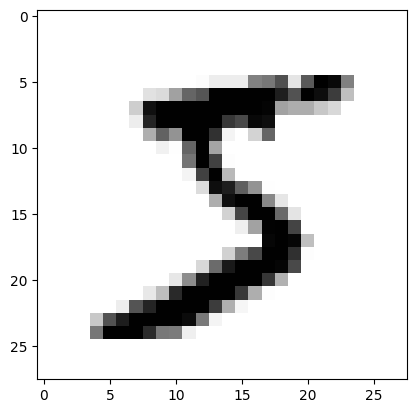

In [145]:
plt.imshow(some_digit_imgae ,cmap=mpl.cm.binary,interpolation="nearest")
plt.axis("on")
plt.show()

In [146]:
y[0]

'5'

In [147]:
import numpy as np
y= y.astype(np.uint8)

In [148]:
y[5]

2

In [149]:
y[0]

5

In [150]:
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

In [151]:
mnist["DESCR"]

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

 # Creat traning set and test set

In [152]:
X_train , X_test , y_train , y_test = X [:60000], X[60000:] , y[:60000] , y[60000:] 

# Binary Classifier

In [153]:
y_train_5 = (y_train == 5)

In [154]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [155]:
y_test_5 =(y_test == 5)

In [156]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [157]:
X[0]
np.size(X[00])

784

 # Pick a Classifier --> stochastic

In [158]:
from sklearn .linear_model import SGDClassifier

In [159]:
sgd_clf =SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [160]:
sgd_clf.predict([some_digit])

array([ True])

In [161]:
sgd_clf.predict([X_train[0]])

array([ True])

# Measuring the Accuracy using the cross validation 

In [162]:
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.base import clone

In [163]:
from sklearn.base import clone
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedGroupKFold
import numpy as np

# Assuming you have defined sgd_clf, X_train, and y_train_5 before this code snippet

skfold = StratifiedGroupKFold(n_splits=3)

for train_index, test_index in skfold.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_fold = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    if X_train_folds.shape[0] == 0 or X_test_fold.shape[0] == 0:
        # Skip this iteration if there are no samples in the training or test fold
        continue

    clone_clf.fit(X_train_folds, y_train_fold)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = np.sum(y_pred == y_test_fold)
    accuracy = n_correct / len(y_test_fold)
    print(f'Accuracy: {accuracy}')





Accuracy: 0.0


In [164]:
from sklearn.model_selection import cross_val_score

In [165]:
cross_val_score(sgd_clf , X_train , y_train_5 , cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [166]:
y_test_5

array([False, False, False, ..., False,  True, False])

In [167]:
sum(y_test_5)

892

In [168]:
y_test_5.size

10000

# Confusion matrix

In [169]:
from sklearn.model_selection import cross_val_predict

In [170]:
y_train_pred = cross_val_predict(sgd_clf , X_train , y_train_5 ,cv = 5)

In [171]:
from sklearn.metrics import confusion_matrix

In [172]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [173]:
confusion_matrix(y_train_5 , y_train_pred)

array([[53115,  1464],
       [  916,  4505]], dtype=int64)

In [174]:
sum(y_train_5)

5421

# Precision Score

In [175]:
from sklearn.metrics import precision_score, recall_score

In [176]:
precision_score(y_train_5 , y_train_pred)

0.7547327860613168

In [177]:
recall_score(y_train_5 , y_train_pred)

0.8310274857037447

# Using binary Classififcation to do the multiclass classification (Ova &OvO)

- one verses - all (OvA)
- one-verses- one (OvO)

In [178]:
sgd_clf.fit(X_train ,  y_train)

SGDClassifier(random_state=42)

In [179]:
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [180]:
sgd_clf.predict([X[6]])


array([1], dtype=uint8)

In [181]:
N= 10
N_cif =N+(N-1)/2

In [182]:
N_cif

14.5

In [183]:
some_digit_score =sgd_clf.decision_function([some_digit])
some_digit_score

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

# Multiple Classifier -> Random Forest Classifier

In [188]:
from sklearn.ensemble import RandomForestClassifier

forest_clf=RandomForestClassifier(random_state=42)
forest_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [189]:
forest_clf.predict([some_digit])

array([5], dtype=uint8)

In [186]:
forest_clf.predict_proba([some_digit])

array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.9 , 0.  , 0.  , 0.  , 0.01]])

In [190]:
y_train_pred = cross_val_predict(forest_clf ,  X_train, y_train , cv=3)

In [191]:
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5840,    1,    8,    2,    4,    9,   20,    1,   35,    3],
       [   1, 6635,   43,   11,   13,    5,    6,   13,   12,    3],
       [  27,   12, 5749,   30,   32,    4,   20,   37,   41,    6],
       [   7,    7,   91, 5811,    3,   63,    7,   49,   61,   32],
       [  12,   13,   14,    1, 5645,    0,   28,   14,   17,   98],
       [  20,    9,    9,   64,   12, 5198,   53,    6,   31,   19],
       [  26,   11,    5,    0,   12,   46, 5803,    0,   15,    0],
       [   4,   24,   58,    6,   37,    1,    0, 6037,   11,   87],
       [   9,   35,   44,   52,   26,   52,   27,    5, 5525,   76],
       [  21,   10,   14,   76,   75,   15,    3,   58,   45, 5632]],
      dtype=int64)

# Confution matrix for the absolute numbers 

<function matplotlib.pyplot.show(close=None, block=None)>

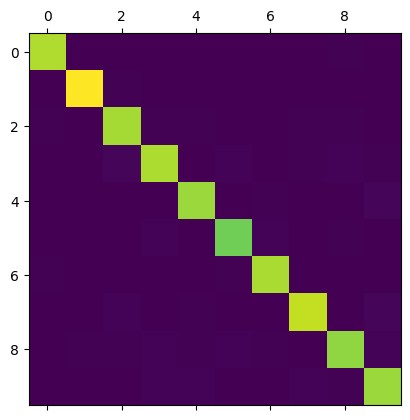

In [192]:
plt.matshow(conf_mx)
plt.show

# Confution matrix for errors 


In [193]:
row_sum = conf_mx.sum(axis=1, keepdims= True)
row_sum

array([[5923],
       [6742],
       [5958],
       [6131],
       [5842],
       [5421],
       [5918],
       [6265],
       [5851],
       [5949]], dtype=int64)

In [194]:
norm_conf_mx=conf_mx/row_sum
norm_conf_mx

array([[9.85986831e-01, 1.68833361e-04, 1.35066689e-03, 3.37666723e-04,
        6.75333446e-04, 1.51950025e-03, 3.37666723e-03, 1.68833361e-04,
        5.90916765e-03, 5.06500084e-04],
       [1.48323939e-04, 9.84129338e-01, 6.37792940e-03, 1.63156333e-03,
        1.92821121e-03, 7.41619697e-04, 8.89943637e-04, 1.92821121e-03,
        1.77988727e-03, 4.44971818e-04],
       [4.53172205e-03, 2.01409869e-03, 9.64921114e-01, 5.03524673e-03,
        5.37092984e-03, 6.71366230e-04, 3.35683115e-03, 6.21013763e-03,
        6.88150386e-03, 1.00704935e-03],
       [1.14173870e-03, 1.14173870e-03, 1.48426032e-02, 9.47806231e-01,
        4.89316588e-04, 1.02756483e-02, 1.14173870e-03, 7.99217093e-03,
        9.94943729e-03, 5.21937694e-03],
       [2.05409106e-03, 2.22526532e-03, 2.39643958e-03, 1.71174255e-04,
        9.66278672e-01, 0.00000000e+00, 4.79287915e-03, 2.39643958e-03,
        2.90996234e-03, 1.67750770e-02],
       [3.68935621e-03, 1.66021029e-03, 1.66021029e-03, 1.18059399e-02,
   

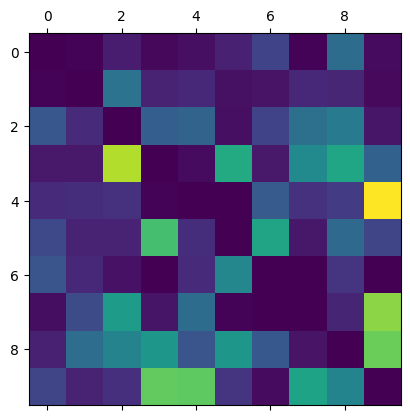

In [195]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx)
plt.show()

In [196]:
cross_val_score(forest_clf,X_train, y_train , cv=3 ,scoring="accuracy")

array([0.9646 , 0.96255, 0.9666 ])

In [198]:
#cl_3, cl_5 = 3,5
#X_33 = X_train[(y_train == cl_3) & (y_train_pred == cl_3)]
#X_35 = X_train[(y_train == cl_3) & (y_train_pred == cl_5)]
#X_53 = X_train[(y_train == cl_5) & (y_train_pred == cl_3)]
#X_55 = X_train[(y_train == cl_5) & (y_train_pred == cl_5)]

#plt.figure(figsize=(8,8))
#plt.subplot(221); plot_digits(X_33[:25], ima

# Multilable Classification 

- So far what we were looking at is -- each object is classified in to one class 
- There are cases that you want to clasify cirtain objects in to multiple classes 
    - Ex: Face recognition 
        - This clasifier is trined to identify three peoples "Alice", "Bob", "Charlie"
        - When the machine is shown a picture of Alice and Charls --> output [1, 0, 1] 
- This is called the multilable classification 

In [200]:
from sklearn.neighbors import KNeighborsClassifier

In [201]:
y_train_large = (y_train >=7)
y_train_odd = (y_train % 2 ==1)
y_multilable = np.c_[y_train_large, y_train_odd] 
y_multilable

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]])

In [202]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train , y_multilable)

KNeighborsClassifier()

In [204]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [206]:
knn_clf.predict([X[17]])

array([[ True, False]])

In [207]:
y_train_knn_pred = cross_val_predict(knn_clf , X_train, y_multilable, cv=3)

In [ ]:
from sklearn.mefrom sklearn.metrics import f1_scoretrics import f1_score
f1_score(y_multilable, y_train_knn_pred, average="macro")f1_score(y_multilable, y_train_knn_pred, average="macro")

# Multioutput Clasification 

In [208]:
noise = np.random.randint(0,100,(len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0,100,(len(X_test), 784))
X_test_mod = X_test + noise 
y_train_mod = X_train
y_test_mod = X_test 

In [210]:
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier()

In [211]:
clean_digit = knn_clf.predict([X_test_mod[0]])

In [212]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

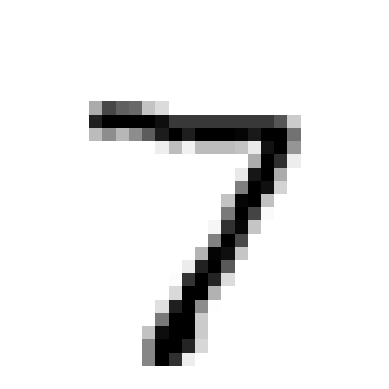

In [213]:
plot_digits([X_test[0]])

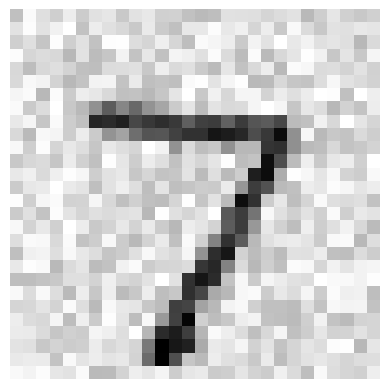

In [214]:
plot_digits([X_test_mod[0]])

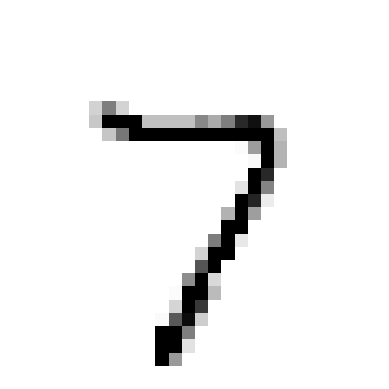

In [215]:
plot_digits(clean_digit

In [217]:
forest_clf2 = RandomForestClassifier(random_state=42)
forest_clf2.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [218]:
forest_clf2.predict([X_test_mod[0]])

array([2], dtype=uint8)

In [219]:
forest_clf2.predict(clean_digit)

array([7], dtype=uint8)